In [18]:
#importando bibliotecas necessarias
import pandas as pd
import pickle as pk


In [19]:
#lendo os arquivos de treino e teste
with open('/content/sample_data/titanicTrain.pkl', 'rb') as f:
  X_treino, Y_treino = pk.load(f)
with open('/content/sample_data/titanicTest.pkl', 'rb') as f:
  X_teste, Y_teste = pk.load(f)

In [20]:
#verificando se importacoes foram bem sucedidas
#X_treino.tail(3)
#Y_treino.tail(3)
#X_teste.tail(3)
#Y_teste.tail(3)

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

#definindo hiperparametros possiveis
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8]
}

#usando o modelo de DecisionTree RandomizedSearchCV, que testa possiveis combinacoes
#dos hiperparametros acima definidos
modelo = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(),
    param_distributions=param_dist,
    cv=10,
    verbose=1,
    n_jobs=5,
    random_state = 32
)

#treinando o modelo (testando varias combinacoes de hiperparametros)
treeCriada = modelo.fit(X_treino, Y_treino)

#melhor modelo encontrado
modelo = modelo.best_estimator_


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [22]:
#testando o modelo (uma unica vez, apenas com o melhor encontrado)
predicoes = modelo.predict(X_teste)

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

#conferindo seus resultados
acuracia = classification_report(Y_teste, predicoes)
print(acuracia)

              precision    recall  f1-score   support

           0       0.85      0.95      0.89       236
           1       0.90      0.73      0.81       152

    accuracy                           0.86       388
   macro avg       0.87      0.84      0.85       388
weighted avg       0.87      0.86      0.86       388



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8634020618556701

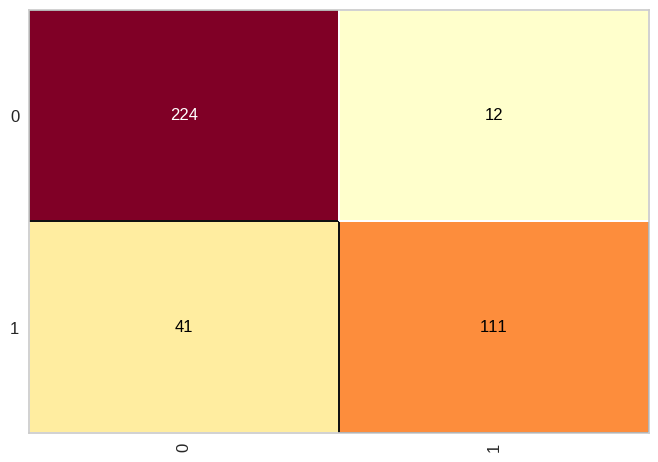

In [36]:
from yellowbrick.classifier import ConfusionMatrix

#mostrando a matriz de confusao
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, Y_treino)
cm.score(X_teste, Y_teste)

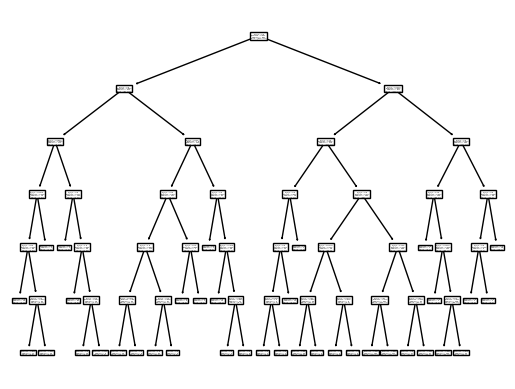

In [25]:
#mostrando a arvore criada
from sklearn import tree
import matplotlib.pyplot as plt
plt.show(tree.plot_tree(modelo))